In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data = data[['price','bedrooms','waterfront','sqft_living','floors','bathrooms','condition', 'grade']]

In [8]:
data

,price,bedrooms,waterfront,sqft_living,floors,bathrooms,condition,grade
0,221900.0,3,0,1180,1.0,1.00,3,7
1,538000.0,3,0,2570,2.0,2.25,3,7
2,180000.0,2,0,770,1.0,1.00,3,6
3,604000.0,4,0,1960,1.0,3.00,5,7
4,510000.0,3,0,1680,1.0,2.00,3,8
...,...,...,...,...,...,...,...,...
21608,360000.0,3,0,1530,3.0,2.50,3,8
21609,400000.0,4,0,2310,2.0,2.50,3,8
21610,402101.0,2,0,1020,2.0,0.75,3,7
21611,400000.0,3,0,1600,2.0,2.50,3,8


In [9]:
data.loc[10:20,'bedrooms'] = np.nan

In [10]:
data.head(30)

,price,bedrooms,waterfront,sqft_living,floors,bathrooms,condition,grade
0,221900.0,3.0,0,1180,1.0,1.00,3,7
1,538000.0,3.0,0,2570,2.0,2.25,3,7
2,180000.0,2.0,0,770,1.0,1.00,3,6
3,604000.0,4.0,0,1960,1.0,3.00,5,7
4,510000.0,3.0,0,1680,1.0,2.00,3,8
5,1225000.0,4.0,0,5420,1.0,4.50,3,11
6,257500.0,3.0,0,1715,2.0,2.25,3,7
7,291850.0,3.0,0,1060,1.0,1.50,3,7
8,229500.0,3.0,0,1780,1.0,1.00,3,7
9,323000.0,3.0,0,1890,2.0,2.50,3,7


In [11]:
missing = data.isna().sum()

In [12]:
missing

price           0
bedrooms       11
waterfront      0
sqft_living     0
floors          0
bathrooms       0
condition       0
grade           0
dtype: int64

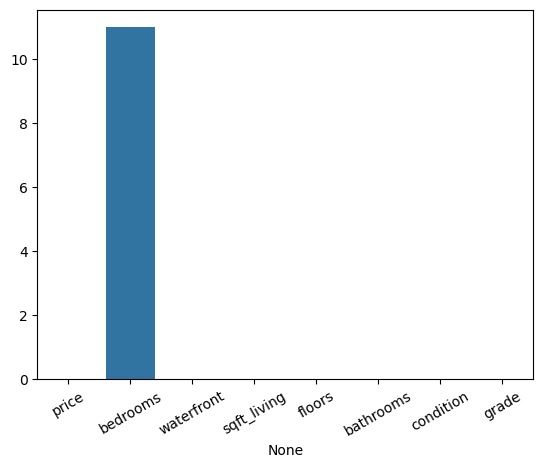

In [13]:
sns.barplot(x=missing.index,y=missing.values);
plt.xticks(rotation=30);

<Axes: xlabel='price', ylabel='Count'>

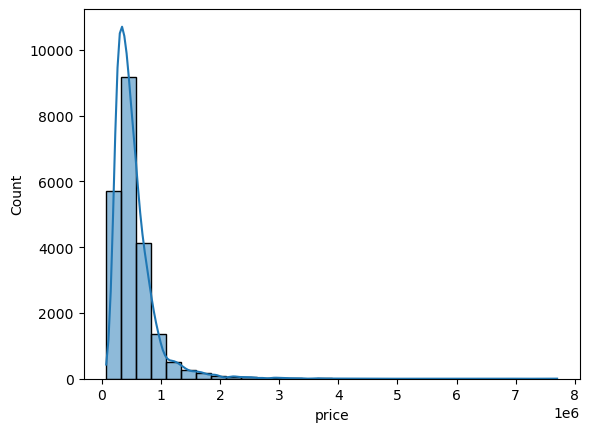

In [14]:
sns.histplot(data['price'],kde=True,bins=30)

<Axes: >

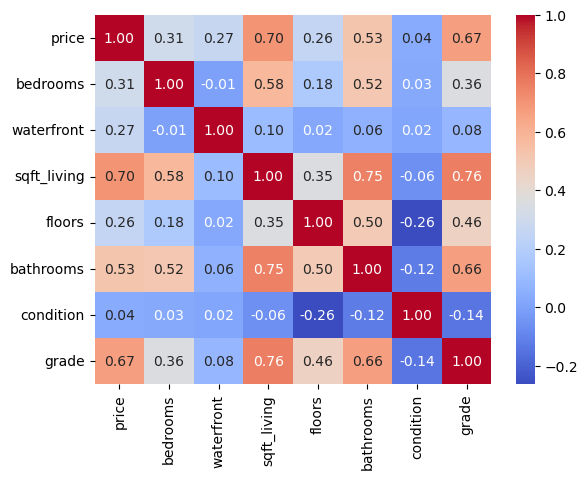

In [15]:
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imp = SimpleImputer(strategy='median')
data['bedrooms'] = imp.fit_transform(data[['bedrooms']])

In [18]:
data.head(30)

,price,bedrooms,waterfront,sqft_living,floors,bathrooms,condition,grade
0,221900.0,3.0,0,1180,1.0,1.00,3,7
1,538000.0,3.0,0,2570,2.0,2.25,3,7
2,180000.0,2.0,0,770,1.0,1.00,3,6
3,604000.0,4.0,0,1960,1.0,3.00,5,7
4,510000.0,3.0,0,1680,1.0,2.00,3,8
5,1225000.0,4.0,0,5420,1.0,4.50,3,11
6,257500.0,3.0,0,1715,2.0,2.25,3,7
7,291850.0,3.0,0,1060,1.0,1.50,3,7
8,229500.0,3.0,0,1780,1.0,1.00,3,7
9,323000.0,3.0,0,1890,2.0,2.50,3,7


In [19]:
data['bedrooms'].median()

3.0

In [20]:
data['waterfront'].dtype

dtype('int64')

In [21]:
data.isna().sum()

price          0
bedrooms       0
waterfront     0
sqft_living    0
floors         0
bathrooms      0
condition      0
grade          0
dtype: int64

In [22]:
data.loc[50,'price'] = data['price'].mean()*10

<Axes: xlabel='price'>

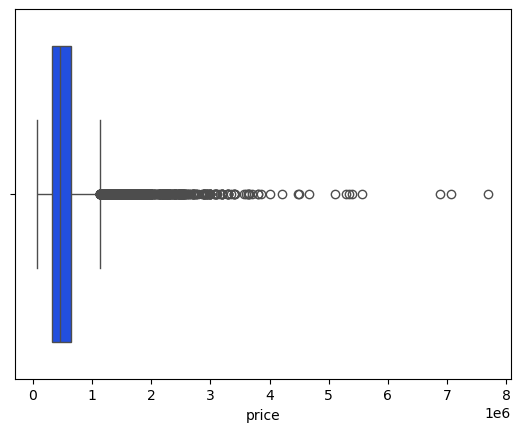

In [23]:
sns.boxplot(x=data['price'],palette='bright')

In [24]:
data.loc[50,'price'] 

5400881.417665294

In [25]:
data['price'].mean()*10

5403274.82969401

In [26]:
data.loc[50,'price'] = data['price'].mean()*100

In [27]:
data['price'].max()

54032748.2969401

In [28]:
data['price'].mean()*100

54257760.40483478

<Axes: xlabel='price'>

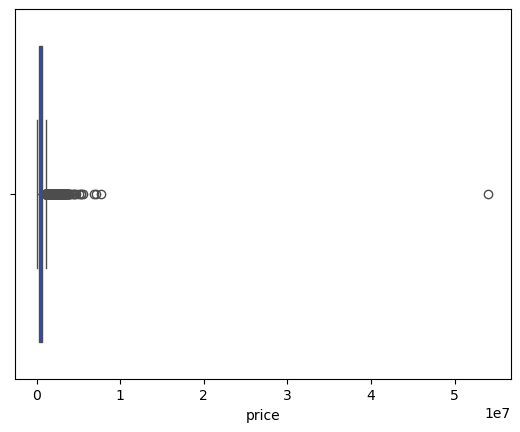

In [29]:
sns.boxplot(x=data['price'],palette='bright')

In [30]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [31]:
upper

1129500.0

In [32]:
data = data[(data['price']>=lower)&(data['price']<=upper)]

In [33]:
data

,price,bedrooms,waterfront,sqft_living,floors,bathrooms,condition,grade
0,221900.0,3.0,0,1180,1.0,1.00,3,7
1,538000.0,3.0,0,2570,2.0,2.25,3,7
2,180000.0,2.0,0,770,1.0,1.00,3,6
3,604000.0,4.0,0,1960,1.0,3.00,5,7
4,510000.0,3.0,0,1680,1.0,2.00,3,8
...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,0,1530,3.0,2.50,3,8
21609,400000.0,4.0,0,2310,2.0,2.50,3,8
21610,402101.0,2.0,0,1020,2.0,0.75,3,7
21611,400000.0,3.0,0,1600,2.0,2.50,3,8


In [34]:
data['price'].max()

1127500.0

<Axes: xlabel='price'>

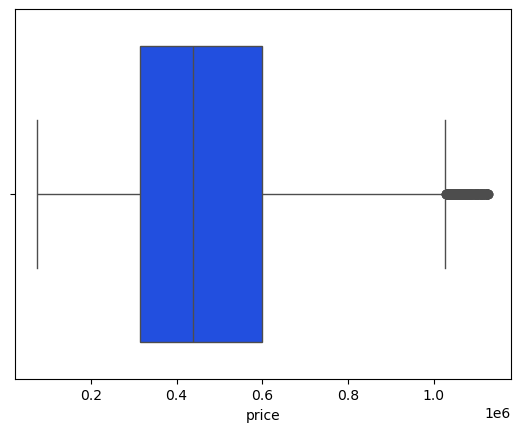

In [35]:
sns.boxplot(x=data['price'],palette='bright')

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
SSC = StandardScaler()

In [38]:
data.columns

Index(['price', 'bedrooms', 'waterfront', 'sqft_living', 'floors', 'bathrooms',
       'condition', 'grade'],
      dtype='object')

In [39]:
data[['bedrooms','sqft_living','floors','bathrooms','condition', 'grade']] = SSC.fit_transform(data[['bedrooms','sqft_living','floors',
                                                                                                     'bathrooms','condition', 'grade']])

In [40]:
data

,price,bedrooms,waterfront,sqft_living,floors,bathrooms,condition,grade
0,221900.0,-0.361151,0,-1.026823,-0.886476,-1.477357,-0.627886,-0.510580
1,538000.0,-0.361151,0,0.767156,0.975642,0.278586,-0.627886,-0.510580
2,180000.0,-1.456808,0,-1.555982,-0.886476,-1.477357,-0.627886,-1.472873
3,604000.0,0.734507,0,-0.020129,-0.886476,1.332152,2.462245,-0.510580
4,510000.0,-0.361151,0,-0.381506,-0.886476,-0.072602,-0.627886,0.451712
...,...,...,...,...,...,...,...,...
21608,360000.0,-0.361151,0,-0.575101,2.837759,0.629775,-0.627886,0.451712
21609,400000.0,0.734507,0,0.431592,0.975642,0.629775,-0.627886,0.451712
21610,402101.0,-1.456808,0,-1.233324,0.975642,-1.828546,-0.627886,-0.510580
21611,400000.0,-0.361151,0,-0.484757,0.975642,0.629775,-0.627886,0.451712


In [41]:
X = data.drop('waterfront',axis=1)
y = data['waterfront']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [44]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [45]:
knn_cl = KNeighborsClassifier(n_neighbors=5,metric='l2')

In [46]:
knn_cl.fit(X_train,y_train)

KNeighborsClassifier(metric='l2')

In [47]:
y_pred = knn_cl.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.9975574010747436

In [50]:
X = data.drop('price',axis=1)
y = data['price']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [52]:
knn_rg = KNeighborsRegressor(n_neighbors=5,metric='l2')

In [53]:
knn_rg.fit(X_train,y_train)

KNeighborsRegressor(metric='l2')

In [54]:
y_pred = knn_rg.predict(X_test)

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_test,y_pred)

0.4419457399419322